In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Single variable

In [44]:
# Trying to simulate movement
x = 0
v = 1
v0 = 1
delta_t = 0.1
positions = []
speeds = []
# Apply some acceleration radomly
acc = 0.2
N = 200
for i in range(N):
    positions.append(x)
    speeds.append(v)
    if np.random.rand() < 0.2:
        v = v + acc
    else:
        v = v0
    # Go back sometimes
    if np.random.rand() < 0.3:
        x = x - v * delta_t
    else:
        x = x + v * delta_t

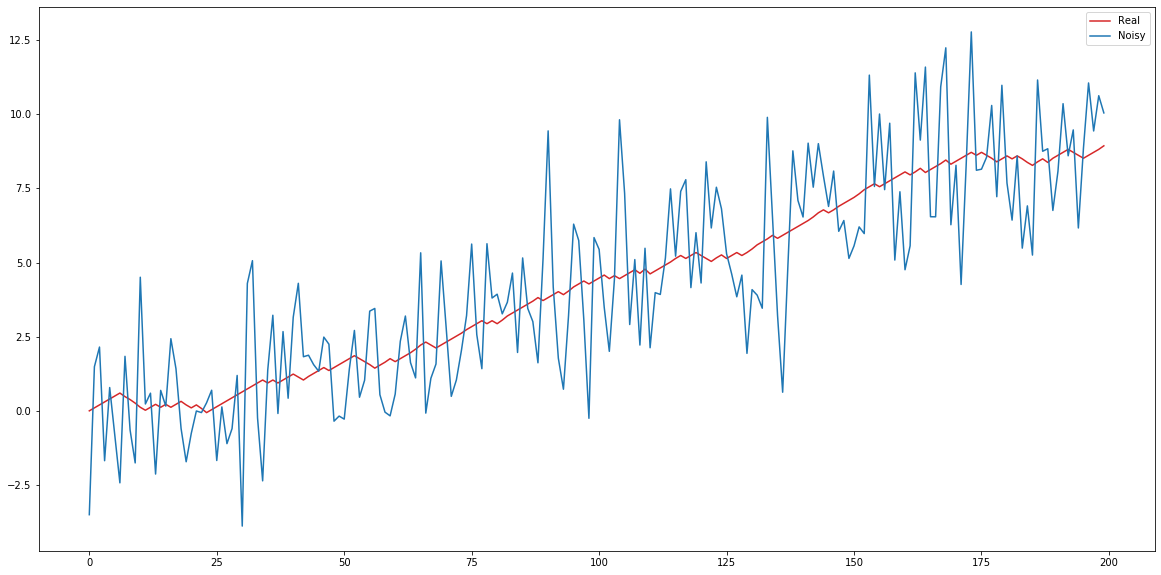

In [45]:
# Add some noise

pos_var = 2
speed_var = 2

noisy_positions = [np.random.normal(x, pos_var) for x in positions]
noisy_speeds = [np.random.normal(x, speed_var) for x in speeds]

plt.figure(figsize=[20,10])
plt.plot(positions, color='tab:red', label='Real')
plt.plot(noisy_positions, color='tab:blue', label='Noisy')
plt.legend()
plt.show()

In [46]:
# Apply complementary filter
estimates = []

x_hat = noisy_positions[0]
sigma_hat = pos_var

estimates = [x_hat]

for i in range(1, N):
    x_bar = estimates[i-1] + noisy_speeds[i-1] * delta_t
    sigma_bar = sigma_hat + (delta_t * speed_var) ** 2
    x_hat = (x_bar * pos_var + noisy_positions[i] * sigma_bar) / (sigma_bar + pos_var)
    sigma_hat = sigma_bar * pos_var / (sigma_bar + pos_var)
    estimates.append(x_hat)


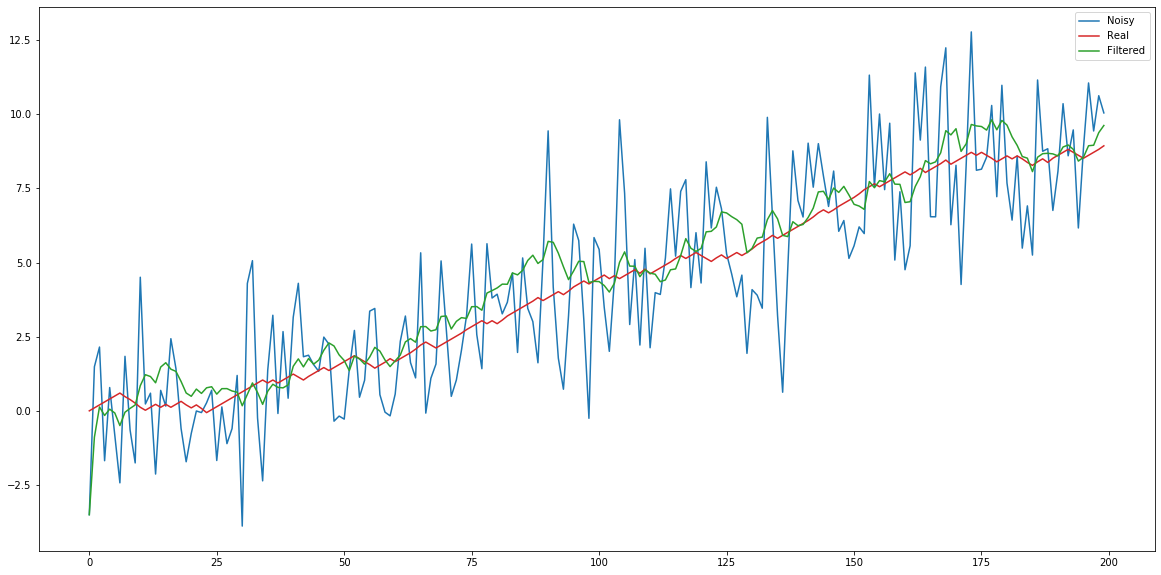

In [47]:
plt.figure(figsize=[20,10])
plt.plot(noisy_positions, color = 'tab:blue', label = 'Noisy')
plt.plot(positions, color = 'tab:red', label= 'Real')
plt.plot(estimates, color = 'tab:green', label = 'Filtered')
plt.legend()
plt.show()